In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Read CSV file

In [2]:
data = pd.read_csv('diamonds.csv',index_col=0)

In [3]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [5]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
data['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [7]:
data['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [8]:
data['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

EDA

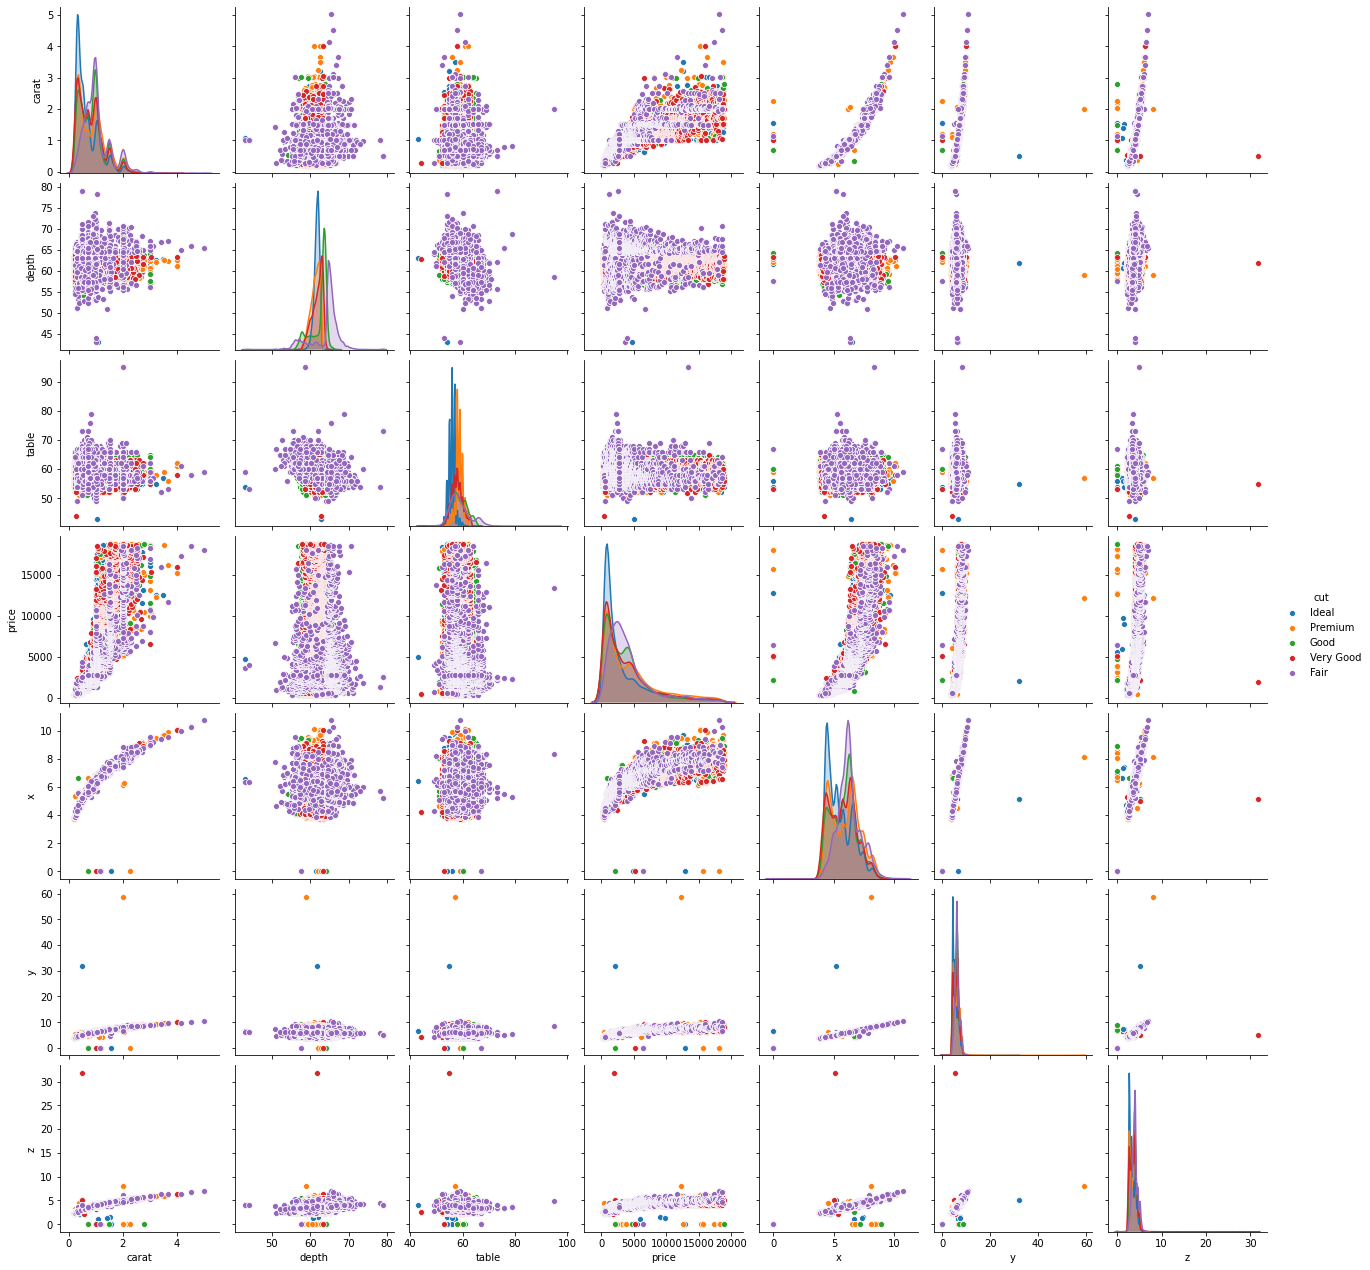

In [9]:
sns.pairplot(data=data,hue='cut')
plt.show()

In [10]:
data_d = pd.get_dummies(data)

In [12]:
data_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   cut_Fair       53940 non-null  uint8  
 8   cut_Good       53940 non-null  uint8  
 9   cut_Ideal      53940 non-null  uint8  
 10  cut_Premium    53940 non-null  uint8  
 11  cut_Very Good  53940 non-null  uint8  
 12  color_D        53940 non-null  uint8  
 13  color_E        53940 non-null  uint8  
 14  color_F        53940 non-null  uint8  
 15  color_G        53940 non-null  uint8  
 16  color_H        53940 non-null  uint8  
 17  color_I        53940 non-null  uint8  
 18  color_

In [13]:
data_d.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [17]:
x = data_d.drop(['price'],axis=1)

In [18]:
y=data_d['price']

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=4,test_size=0.3)

In [21]:
lin = LinearRegression()

In [22]:
lin.fit(x_train,y_train)

LinearRegression()

In [23]:
lin_pred = lin.predict(x_test)

plotting predicted vs actual price

In [ ]:
sns.jointplot(x=y_test,y=lin_pred,kind='reg',line_kws={"color": "red"})
plt.show()

In [27]:
print('Linear regression accuracy: ')
crossl = cross_val_score(estimator = lin, X = x_train, y = y_train, cv = 4,verbose = 0)
msel = mean_squared_error(y_test, lin_pred)
rmsel = mean_squared_error(y_test, lin_pred)**0.5
mael = mean_absolute_error(y_test, lin_pred)
r2l = r2_score(y_test, lin_pred)

print('Cross val     : ',crossl)
print('MAE           : ', mael)
print('MSE (RMSE)    : ', msel,' (',rmsel,')')
print('R2 score      : ', r2l)

Linear regression accuracy: 
Cross val     :  [0.91515159 0.92394901 0.92069803 0.9168974 ]
MAE           :  738.0159372915109
MSE (RMSE)    :  1234805.4035789026  ( 1111.217982026435 )
R2 score      :  0.9203697339675843
